# Créer de beaux graphes avec Seaborn
> Dans un atelier précédent, nous avons quelque peu couvert le module `matplotlib`. Pourquoi voudriez-vous apprendre le module `Seaborn` en plus? Ce module offre:
* Une API orienté jeu de données pour examiner les relations entre multiples variables
* Une façon simple et intuitive d'intéragir avec `matplotlib` et de styler ses graphes avec plusieurs thèmes intégrés
* Une vue utile de la structure intégrale de jeux de données complexes.
* Des outils pour choisir différentes palettes de couleurs afin de trouver des particularités dans nos données.

> Et la raison principale est que `Seaborn` est beaucoup visuellement plaisant que `matplotlib`!

In [1]:
# cette ligne permet d'afficher ses graphes directement dans jupyter sans `plt.show()`
%matplotlib inline

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt 
from IPython.display import Image
sns.set()



## Introduction
#### Pourquoi est-ce important d'avoir de bons et beaux outils de visualisation?
> Parce que personne ne se soucie de votre code et de vos algorithmes si vous ne pouvez pas montre leur valeur efficacement.

#### À propos des données que nous allons utiliser
> Nous allons utiliser les jeux de données offert par `seaborn` puisqu'ils offrent des propriétés de visualisations intéressantes. Vous pouvez trouver tous les jeux de données disponible sur https://github.com/mwaskom/seaborn-data.

### Graph de base: le `relplot`

In [2]:
fmri_data = sns.load_dataset("gammas")
fmri_data.head(1) # représentation concise de notre jeu de données


,timepoint,ROI,subject,BOLD signal
0,0.0,IPS,0,0.513433


In [3]:
# nous allons garder seulement les 5 premiers sujets
fmri_subset = fmri_data[fmri_data.subject < 6]
fmri_subset.shape

(1800, 4)

> Maintenant que nous avons les données fmri pour les 5 premiers sujets, nous allons les illustrer.

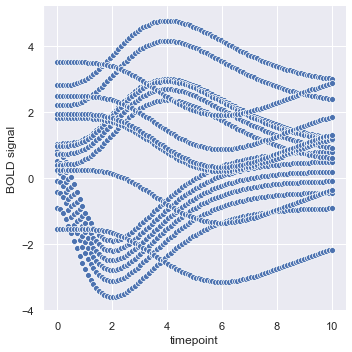

In [4]:
# "Bold signal" et "timepoint" sont des colonnes dans fmri_subset
sns.relplot(x="timepoint", y="BOLD signal", data=fmri_subset) 


### Exercice !
> Expliquer pourquoi nous avons autant de lignes dans notre graphique.


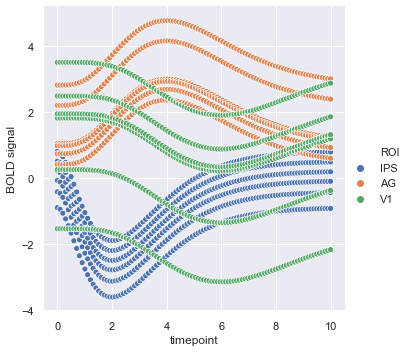

In [5]:
# ROI est également une colonne dans notre jeu de donnée
sns.relplot\
    (x="timepoint", y="BOLD signal", hue="ROI", data=fmri_subset)

> Désormais, c'est plus facile de comprendre notre graphique. Le paramètre `hue` permet de séparer les points ou les lignes par couleur dépendant de leur valeur catégorique. En plus, nous avons besoin d'une façon de distinguer les sujets. Nous allons utiliser le paramètre `style` qui permet de séparer les points à l'aide de formes géométriques simples basées sur les valeurs catégoriques. 


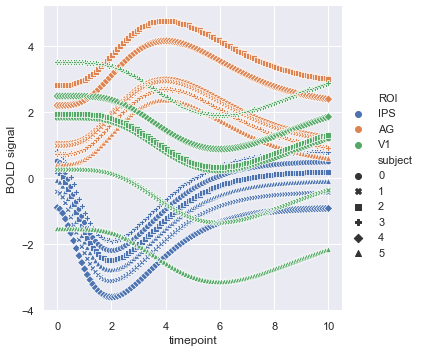

In [6]:
# le "subject" est une colonne dans notre dataframe
sns.relplot(x="timepoint", y="BOLD signal", hue="ROI", style="subject", data=fmri_subset)


> C'est quelque peu difficile de visualiser les formes des points. Nous allons centrer un peu. Afin de centrer, nous allons voir le concept des `FacetGrid`.
Une `FacetGrid` est une grille qui permet d'afficher plusieurs relations conditionnelles. Si on regarde ce qu'un graphique `relplot` retourne:

seaborn.axisgrid.FacetGrid

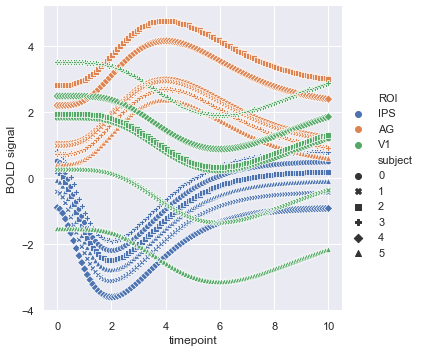

In [7]:
g = sns.relplot(x="timepoint", y="BOLD signal", hue="ROI", style="subject", data=fmri_subset)
type(g)

> Effectivement, déjà une `relplot` retourne une `FacetGrid`. Une `FaceGrid` est une collection de graphiques rassemblées ensemble. Voyons un exemple.



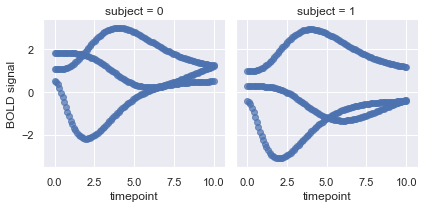

In [8]:
two_subjects = fmri_data[fmri_data.subject.isin([0,1])]

# 'subject' est une colonne du jeu de donnée "two_subjects"
g = sns.FacetGrid(data=two_subjects, col="subject")

# nous utilisons une fonction de `matplotlib` ce qui est possible dans le module `seaborn`
# nous aurions également pu utiliser une fonction de `seaborn`
# le paramètre alpha contrôle l'opacité des points dans la scatter plot
g.map(plt.scatter, "timepoint", "BOLD signal", alpha=0.7)
g

> Ajoutons un peu de fonctionnalité sur le graphique précédent.


C:\Users\mystery\Anaconda3\envs\tutoriels\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


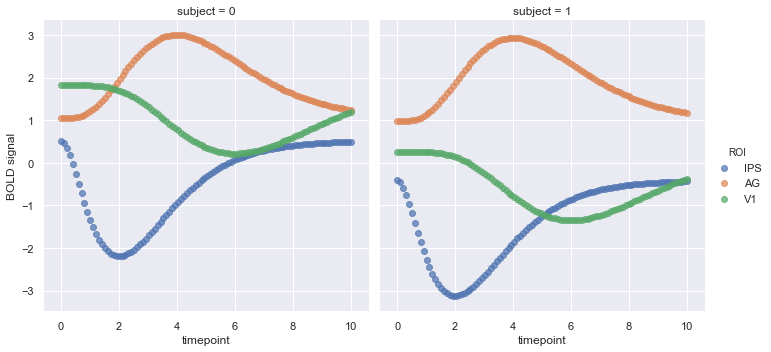

In [9]:
def plot_simple_facet(plotting_fct):
    with sns.axes_style("darkgrid"):
        g = sns.FacetGrid(data=two_subjects, col="subject", hue="ROI", size=5 )
        g.map(plotting_fct , "timepoint", "BOLD signal", alpha=0.7)
        g.add_legend() 
        return g
    
plot_simple_facet(plt.scatter)

> Analysons la cellule précédente ligne par ligne.  
>` with sns.axes_style("darkgrid"):`  
> Ce `with statement` change temporairement l'apparence générale de nos graphiques. Nous allons revenir sur les différents styles que nous pouvons utiliser avec `seaborn`.    

> `g = sns.FacetGrid(data=two_subjects, col="subject", hue="ROI", size=5 )`  
> Nous assignons une `FacetGrid` avec le jeu de donnée *two_subjects* à la variable `g`. Le paramètre *col* sert à choisir sur quel colonne illustrer des graphiques individuels. Évidemment, cette colonne doit avoir des valeurs de type catégorique. Le paramètre *size* nous permet de modifier la taille de nos graphiques (le défaut est 3). 

> `g.map(plotting_fct , "timepoint", "BOLD signal", alpha=0.7)`  
> Ici nous appliquons une fonction de mappage sur la `FacetGrid`. Le premier argument est le type de visualisation. Le deuxième argument est le vecteur x à visualiser. Le troisième argument est le vecteur y à visualiser. Finalement, le dernier argument est la variable alpha qui contrôle l'opacité des points.  

> `g.add_legend()`  
> Nous ajontons manuellement une légende sur notre `FacetGrid`.

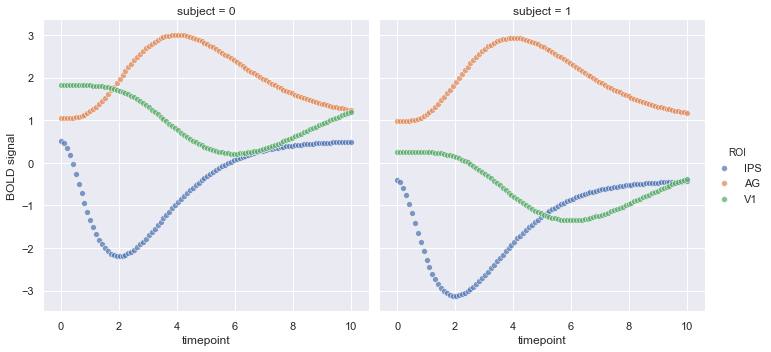

In [10]:
# utilisons une fonction graphique différente
plot_simple_facet(sns.scatterplot)

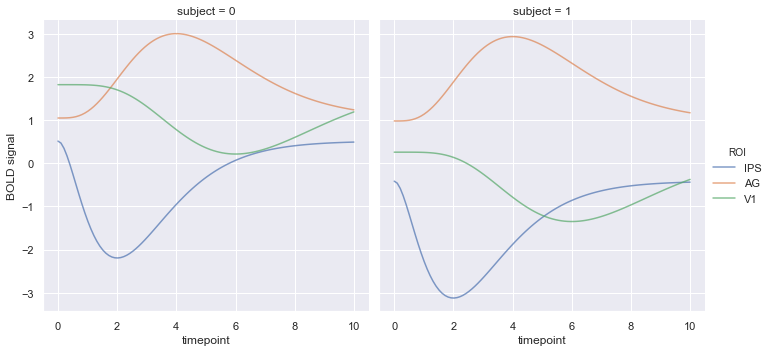

In [11]:
# une fonction graphique différente
plot_simple_facet(sns.lineplot)


## Taille et limites des axes
> Dans cette section nous allons regarder comment transformer un graphique saturé et séparer ses composantes.

In [12]:
diamonds_df = sns.load_dataset("diamonds")
diamonds_df.head(1)
# calculons le volume
diamonds_df['volume'] = diamonds_df.x * diamonds_df.y * diamonds_df.z

plotting_df = diamonds_df.drop(['carat', 'clarity', 'table', 'depth', 'x', 'y', 'z'], axis=1)

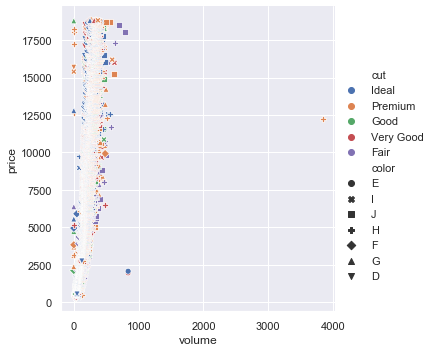

In [13]:
sns.relplot(x="volume", y="price", hue="cut", style="color", data=plotting_df)


(0, 1000)

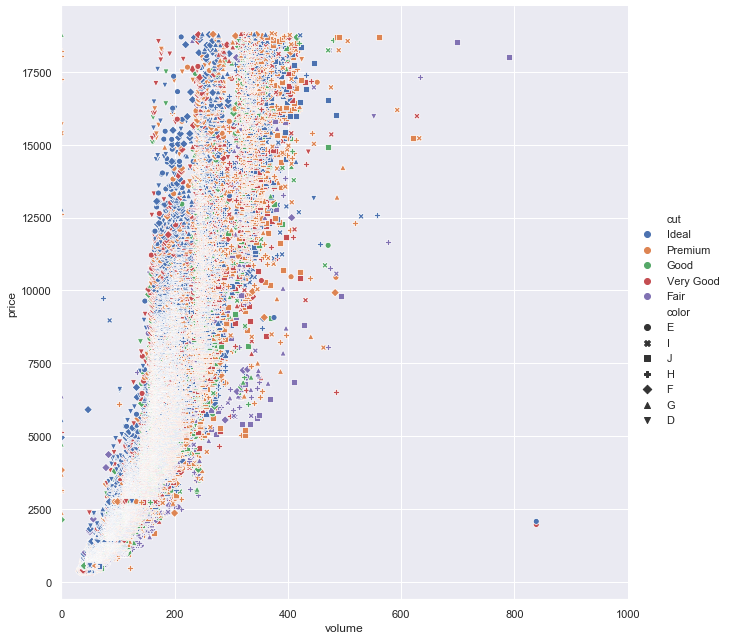

In [14]:
# premier graphique, incompréhensible et saturé
g = sns.relplot(x="volume", y="price", hue="cut", style="color", height=9, aspect=1, data=plotting_df)
g.ax.set_xlim(0, 1000)


> Le graphique précédent est pathétique, il est beaucoup trop difficile à interpréter. Avant de l'améliorer, commençons par expliquer les nouveaux concepts et paramètres introduits.  
> `height=9, aspect=1` 
> Ces deux paramètres déterminent la taille de notre graphique. Nous garder la valeur par défaut pour l'`aspect` et nous augmentons la `size` de sa valeur par défaut de 5 jusqu'à 9.  
>`g.ax_set_xlim(0,1000)`  
> Ici, nous modifions l'attibut `ax` du `FacetGrid`. L'attribur `ax` appartient à la classe sous-jacente `axes` de `matplotlib`. Souvenons-nous que `seaborn` est étroitement lié à `matplotlib`. La liste complète des attributs de vos axes que vous pouvez modifier peut-être trouvée dans la [documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib
>.pyplot.axes.html). 



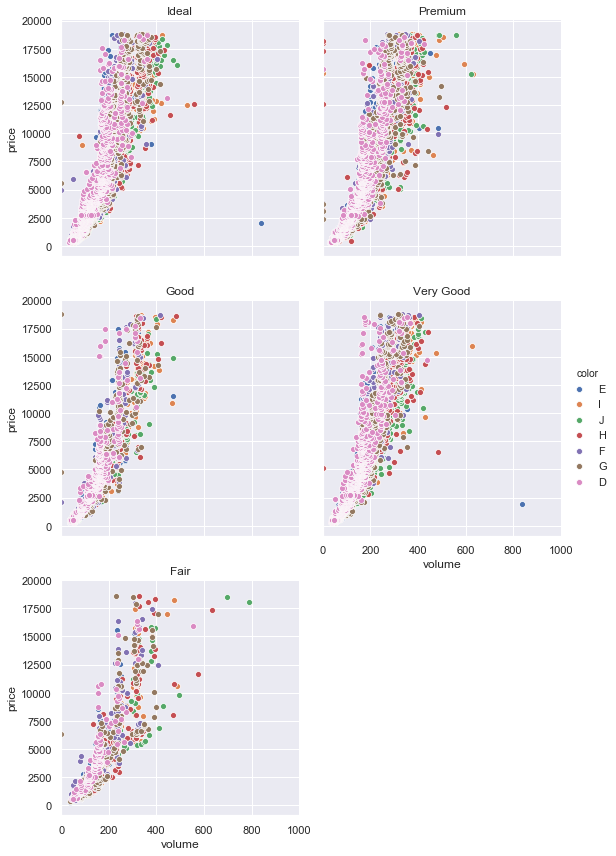

In [15]:
g = sns.FacetGrid(plotting_df, col="cut", col_wrap=2, xlim=(0,1000), hue="color", size=4)
g.map(sns.scatterplot, "volume", "price")
g.add_legend()
g.set_titles("{col_name}")

> Dans la cellule précédente, nous séparons le graphique originel en 5 graphiques distincts, un pour chaque valeur de `cut`. Nous utilisons l'attribut `col_wrap` afin d'avoir 3 rangées (au lieu d'avoir 1 rangée de 5 colonnes).

## Apparence et esthétique
> Nous savons désormais comment préparer nos graphiques ainsi que comment modifier leur taille et leur forme. Maintenant, concentrons-nous sur la partie esthétique de `seaborn`.  
Le paramètre de contrôle le plus général est les thèmes prédéfinis: `ticks`, `white`, `dark`, `whitegrid`, 
>`darkgrid`. 

In [16]:
fmri_data2 = sns.load_dataset("fmri")
single_fmri = fmri_data2[fmri_data2.subject=="s0"].drop(['event', 'region'], axis=1)
single_fmri.head(1)

,subject,timepoint,signal
14,s0,18,-0.07557


Text(0.5, 1, 'default: dark')

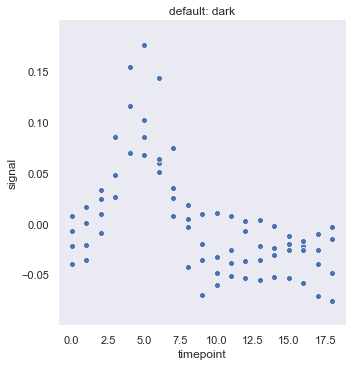

In [17]:
sns.set_style("dark")
g = sns.relplot(x="timepoint", y="signal", data=single_fmri)
g.ax.set_title("default: dark")

Text(0.5, 1, 'white')

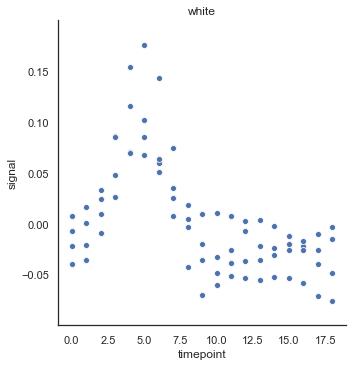

In [18]:

sns.set_style("white")

g = sns.relplot(x="timepoint", y="signal", data=single_fmri)
g.ax.set_title("white")

Text(0.5, 1, 'darkgrid')

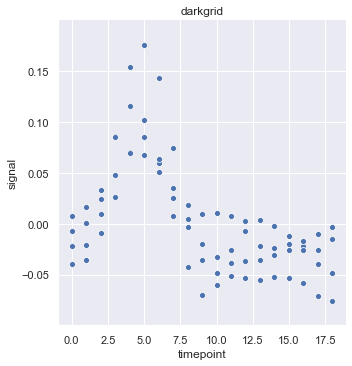

In [19]:

sns.set_style("darkgrid")

g = sns.relplot(x="timepoint", y="signal", data=single_fmri)
g.ax.set_title("darkgrid")

Text(0.5, 1, 'ticks')

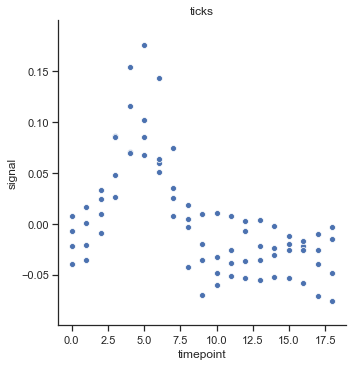

In [20]:

sns.set_style("ticks")

g = sns.relplot(x="timepoint", y="signal", data=single_fmri)
g.ax.set_title('ticks')



> Si nous voulons temporairement modifier nos styles, nous pouvons utiliser un `with statement` avec la fonction `axes_style`.

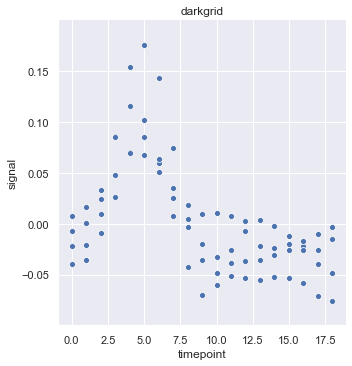

In [21]:

with sns.axes_style("darkgrid"):
    g = sns.relplot(x="timepoint", y="signal", data=single_fmri)
    g.ax.set_title('darkgrid')


In [22]:
# la liste des paramètres de style que nous pouvons écraser
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

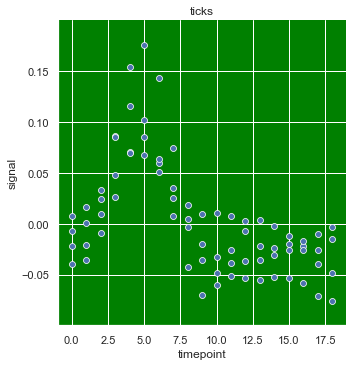

In [23]:
# par exemple, afin de changer la couleur de fond (attention! dégeulasse!)
with sns.axes_style("darkgrid", {"axes.facecolor": "green"}):
    g = sns.relplot(x="timepoint", y="signal", data=single_fmri)
    g.ax.set_title('ticks')

### Exercice !
> Créer un `relplot` en utilisant le jeu de donnée *single_fmri* avec un fond blanc, aucun `spines` sur les axes et des lignes de grille gris foncé.

> Voyons si nous ne pouvons pas embellir nos graphiques en utilisant des palettes de couleurs différentes...  
> Il y a 6 palettes de couleurs par défaut: `deep`, `muted`, `pastel`, `bright`, `dark` and `colorblind`. Nous pouvons également créer nos propres palettes de couleurs.


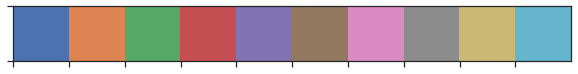

In [24]:
new_palette = sns.color_palette("deep")
sns.palplot(new_palette)



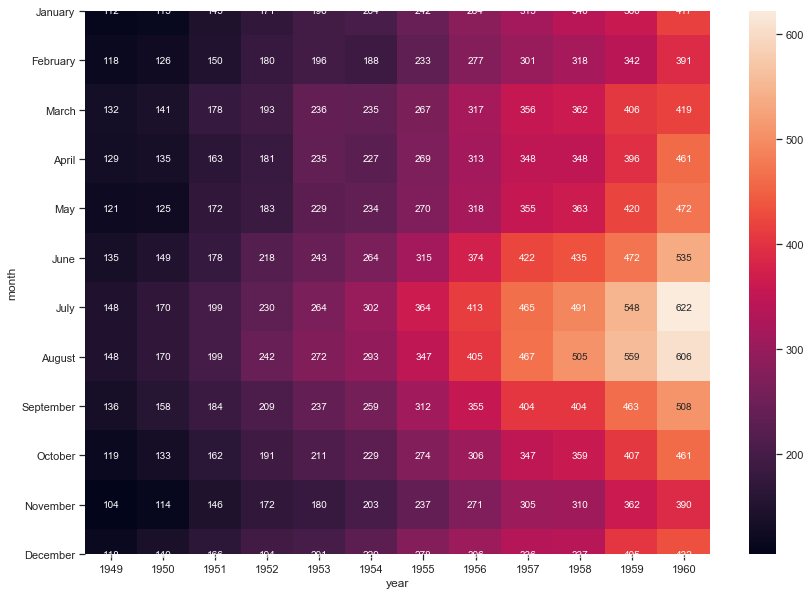

In [25]:
flights_df = sns.load_dataset("flights")

# créons un tableau croisé dymanique à partir de nos données de vol
flights = flights_df.pivot(index="month", columns="year", values="passengers")

_, ax = plt.subplots(figsize=(14, 10))
# illustrons la "heatmap"
ax = sns.heatmap(flights, annot=True, fmt="d", ax=ax)




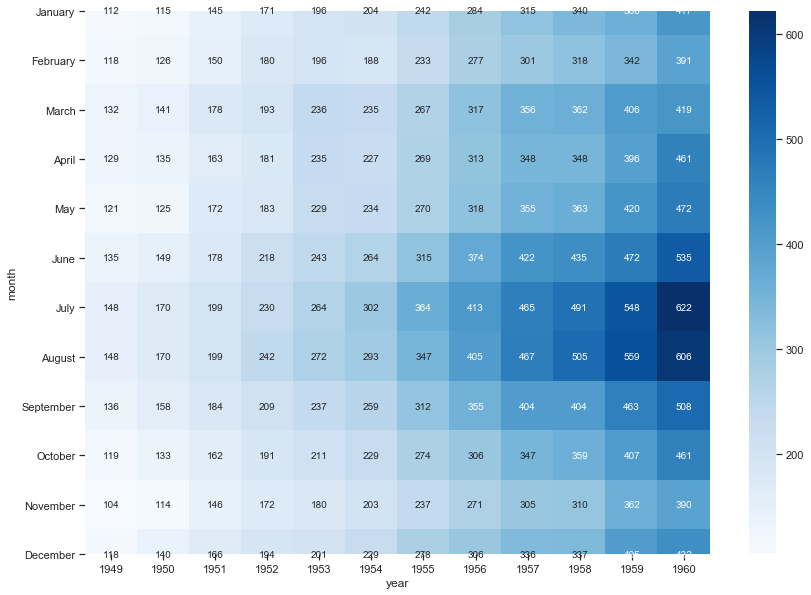

In [26]:
_, ax = plt.subplots(figsize=(14, 10))
# illustrons la "heatmap" avec des couleurs différentes spécifiées par "cmap"
ax = sns.heatmap(flights, annot=True, fmt="d", cmap="Blues", ax=ax)


In [27]:
sns.set_palette("BrBG")

## Les différents graphiques de `Seaborn`
> Voyons brièvement tous les types de graphiques que nous pouvons utiliser avec `seaborn`.

### CountPots
> Les `countplots` peuvent être très utiles afin de visualiser les fréquences de nos différentes valeurs catégoriques pour une variable.

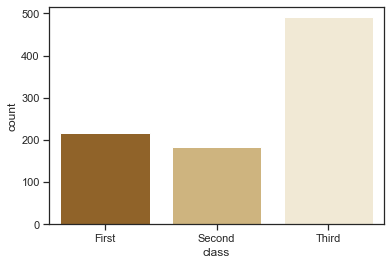

In [28]:
titanic_df = sns.load_dataset("titanic")

# quel sont les différentes classes dans le titanic?
sns.countplot(x='class', data=titanic_df)

### KDE Plots
> Une estimation par noyau est un moyen non-paramétrique d'estimer une variable aléatoire à densité.

In [29]:
# enlevons les not a number de notre jeu de donnée
print(len(titanic_df))
print(titanic_df.isnull().sum())
titanic_df = titanic_df.dropna(subset=['age'])
len(titanic_df)

891
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


714

(0, 60)

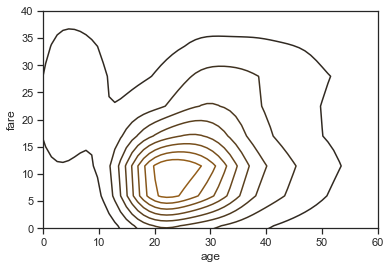

In [30]:
ax = sns.kdeplot(titanic_df.age, titanic_df.fare)
ax.set_ylim(0,40) # limitons la portée de l'axe y à [0,40]
ax.set_xlim(0,60) # limitons la portée de l'axe x à [0,60]

(0, 300)

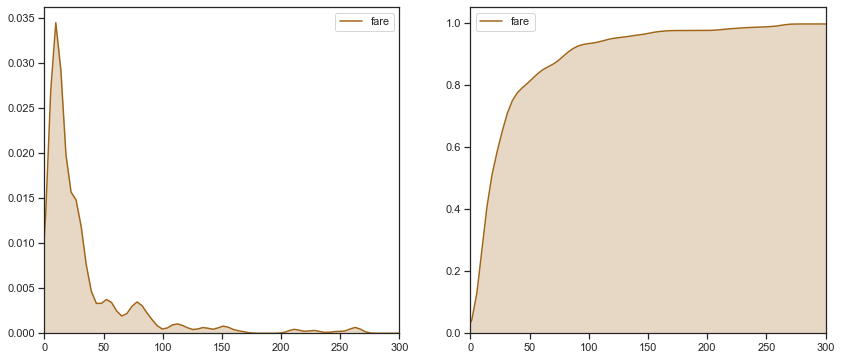

In [31]:
# 2 graphiques côte à côte
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))


# nous pouvons également illustrer un estimé par noyau d'une variable seule
ax1 = sns.kdeplot(titanic_df.fare, shade=True, ax=ax[0])
ax1.set_xlim(0, 300)

# fonction de répartition par l'estimé par noyau
ax2= sns.kdeplot(titanic_df.fare, shade=True, cumulative=True, ax=ax[1])
ax2.set_xlim(0,300)


> Dans la cellule précédente, nous avons introduit quelques nouveaux concepts. Premièrement, nous avons utilisé 2 objets `ax` retournés par `plt.subplots` puisque nous voulions avoir 2 graphiques côte à côte (`ncols=2`). Ensuite, nous avons utilisé ces `ax` afin d'illustrer nos `kdeplots` en passant `ax[0]` et `ax[1]` comme argument aux `kdeplots`.  
> L'argument `shade=True` est utilisé afin de colorer l'aire en dessous de la courbe en passant.

### `Distplots`
> Les displots sont des histogrammes.

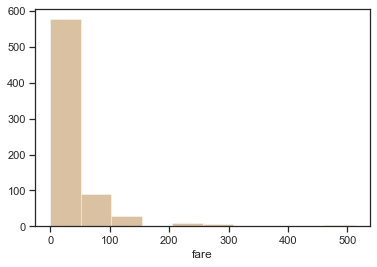

In [32]:
ax = sns.distplot(titanic_df.fare, bins=10, kde=False)

### Exercice!
> Changer la couleur du graphique précédent en *vert*,  limiter la taille de son axe des `x`, ajouter un titre informatif et (_bonus_: ajouter un titre à l'axe des `y`).

### `Jointplots` et les `hexplots`
> Les *jointplots* et les *hexplots*  nous offrent les outils pour illustrer des graphiques bivariés assemblés avec des graphiques de distribution univariable marginale.

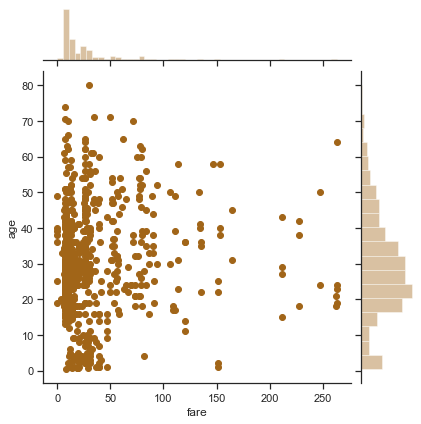

In [33]:
sns.set_style("ticks")

sns.jointplot(x='fare', y="age", data=titanic_df[titanic_df.fare < 300])

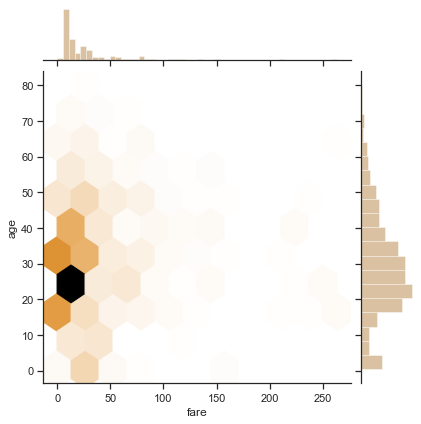

In [34]:
# la valeur par défaut de l'argument "gridsize" est de 100, cet argument modifie la taille des hex
sns.jointplot(x='fare', y='age', data=titanic_df[titanic_df.fare < 300], kind='hex', gridsize=10)

### Diagrammes à barres et `violin plots`
>Les diagrammes à barres affichent le résumé en 5 nombres d'un jeu de données. Ce résumé consiste en le minimum, le premier quartile, la médiane, le troisième quartile et le maximum. Une boîte est affichée entre le premier et le troisième quartile. La ligne dans la boîte illustre la valeur de la médiane.    


(0, 250)

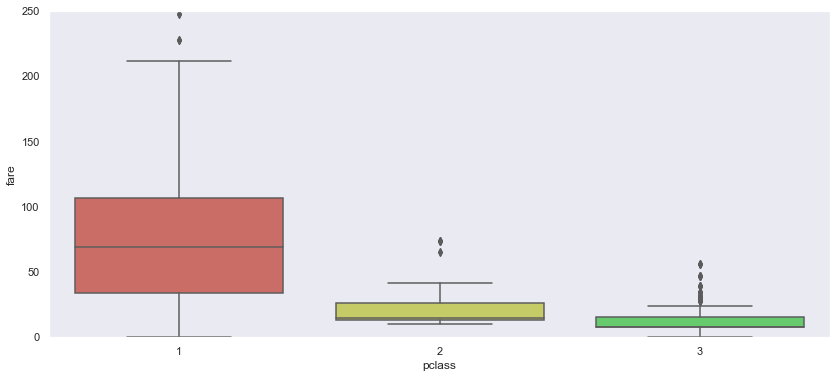

In [35]:
sns.set_palette("hls")
sns.set_style("dark")

_, temp_ax = plt.subplots(figsize=(14,6))

ax = sns.boxplot(x='pclass', y='fare', ax=temp_ax, data=titanic_df)
ax.set_ylim(0,250)

> Les petits points au-dessus des boîtes sont les observations aberrantes. Les *moustaches* autour des boîtes illustrent l'éventail des points autour de la distribution.  
> Le problème avec les diagrammes en boîte est la présupposition que les données sont uniformément distribuées, du moins dans les boîtes.  
> Pour la plupart des jeux de données, vous seriez mieux d'utiliser les `violin plots` qui sont plus esthétiquement plaisants ainsi qu'informatique. Ces diagrammes remplacent les boîtes par des estimés par noyaux.


(0, 250)

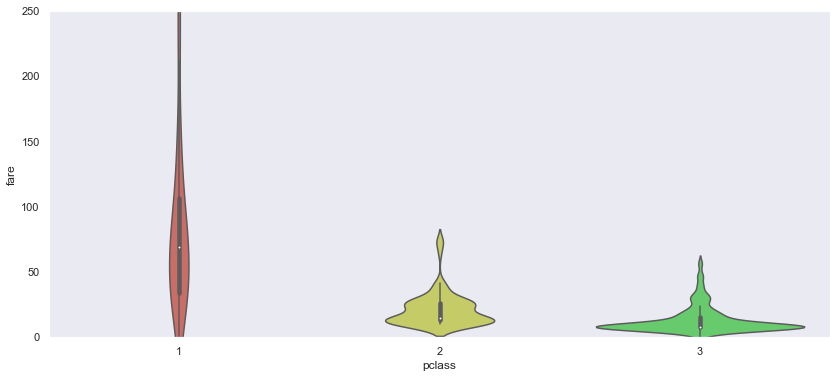

In [36]:
_, temp_ax = plt.subplots(figsize=(14,6))

ax = sns.violinplot(x='pclass', y='fare', ax=temp_ax, data=titanic_df)
ax.set_ylim(0,250)

> C'est beaucoup plus facile de déduire des conclusions et de trouver de l'information à partir des `violin plots`. Par exemple, dans le cas présent, nous voyons qu'il y a beaucoup de variation dans le prix payé par les clients en première classe. Dans cette classe, il y a probablement plusieurs cabines différentes avec des prix tout aussi différents. En revanche, la plupart des clients dans la troisième classe ont payé le même prix (probablement pour un lit superposé dans une minscule cabine).



### Exercice!
> Reproduiser le graphique suivant en utilisant le jeu de données Pokemon.

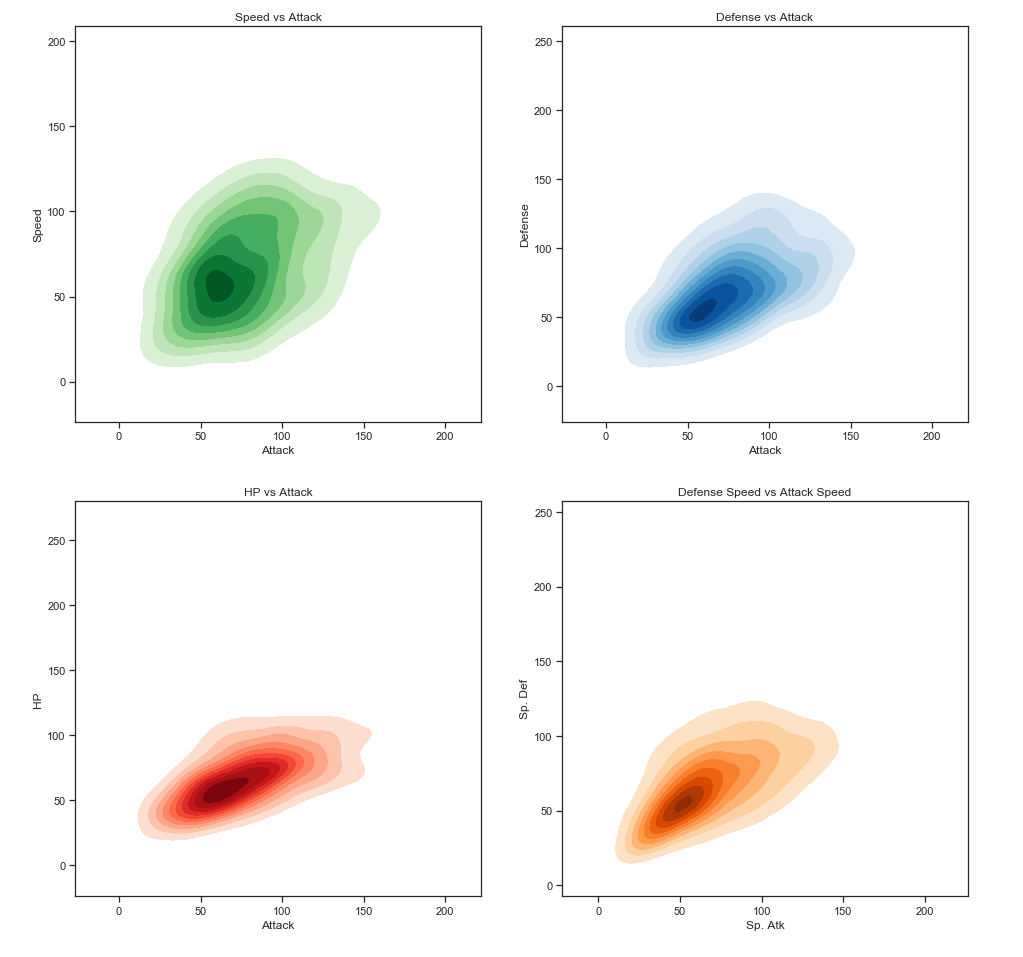

In [38]:
Image("./last_exercise.png")

In [37]:
pokemon_dataset = pd.read_csv("Pokemon.csv")
pokemon_dataset.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
